**Imports**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, make_scorer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pickle import dump

**Functions**

In [31]:
def custom_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

class Assessment():
    @staticmethod
    def assess(y_train, y_test, y_train_pred, y_test_pred):
        accuracy_train_bernoulli = accuracy_score(y_train, y_train_pred)
        f1_train_bernoulli = f1_score(y_train, y_train_pred, average='macro')
        classification_train_bernoulli = classification_report(y_train, y_train_pred)
        print(f'Accuracy on train data is {accuracy_train_bernoulli:.2f}')
        print(f'F1 Score on train data is {f1_train_bernoulli:.2f}')
        print(f'Classification report on train data is\n {classification_train_bernoulli}')
        accuracy_predict_bernoulli = accuracy_score(y_test, y_test_pred)
        f1_test_bernoulli = f1_score(y_test, y_test_pred, average='macro')
        classification_test_bernoulli = classification_report(y_test, y_test_pred)
        print(f'Accuracy on test data is {accuracy_predict_bernoulli:.2f}')
        print(f'F1 Score on test data is {f1_test_bernoulli:.2f}')
        print(f'Classification report on test data is\n {classification_test_bernoulli}')
        
    @staticmethod
    def cm(y_test, y_test_pred):
        cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot()
        plt.show()
        

**Globals**

In [32]:
tfidf = True

**Loading the dataset**

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

In [24]:
df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [6]:
#Removing package_name variable
df.drop('package_name', axis=1, inplace=True)

In [7]:
#Processing test
df['review'] = df['review'].str.strip().str.lower().replace('\t', ' ').replace('\n', ' ')

In [8]:
df.tail()

,review,polarity
886,loved it i loooooooooooooovvved it because it ...,1
887,all time legendary game the birthday party lev...,1
888,ads are way to heavy listen to the bad reviews...,0
889,fun works perfectly well. ads aren't as annoyi...,1
890,they're everywhere i see angry birds everywher...,1


**Dataset Split**

In [9]:
X = df.drop('polarity', axis=1)
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
y.value_counts()

polarity
0    584
1    307
Name: count, dtype: int64

<Axes: ylabel='count'>

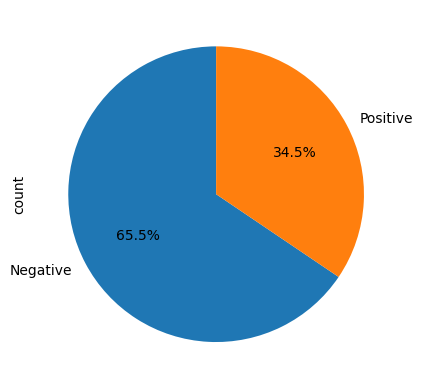

In [11]:
y.value_counts().plot.pie(labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90)

In [12]:
print('Train data:\nX:', X_train.shape, 'y:', y_train.shape)
print('Test data:\nX:', X_test.shape, 'y:', y_test.shape)

Train data:
X: (712, 1) y: (712,)
Test data:
X: (179, 1) y: (179,)


**Transforming data into array**

In [13]:
if tfidf == True:
    vector = TfidfVectorizer()
else:
    vector = CountVectorizer()
X_train = vector.fit_transform(X_train['review']).toarray()
X_test = vector.transform(X_test['review']).toarray()

**Model - BernoulliNB**

In [14]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [26]:
#Model Prediction - train data
y_train_pred = model.predict(X_train)

#Model Prediction - test data
y_test_pred = model.predict(X_test)

In [27]:
#Evaluation of the model
accuracy_train_bernoulli = accuracy_score(y_train, y_train_pred)
f1_train_bernoulli = f1_score(y_train, y_train_pred, average='macro')
classification_train_bernoulli = classification_report(y_train, y_train_pred)
print(f'Accuracy on train data is {accuracy_train_bernoulli:.2f}')
print(f'F1 Score on train data is {f1_train_bernoulli:.2f}')
print(f'Classification report on train data is\n {classification_train_bernoulli}')

accuracy_predict_bernoulli = accuracy_score(y_test, y_test_pred)
f1_test_bernoulli = f1_score(y_test, y_test_pred, average='macro')
classification_test_bernoulli = classification_report(y_test, y_test_pred)
print(f'Accuracy on test data is {accuracy_predict_bernoulli:.2f}')
print(f'F1 Score on test data is {f1_test_bernoulli:.2f}')
print(f'Classification report on test data is\n {classification_test_bernoulli}')

Accuracy on train data is 0.96
F1 Score on train data is 0.96
Classification report on train data is
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       458
           1       0.97      0.92      0.94       254

    accuracy                           0.96       712
   macro avg       0.96      0.95      0.96       712
weighted avg       0.96      0.96      0.96       712

Accuracy on test data is 0.85
F1 Score on test data is 0.81
Classification report on test data is
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       126
           1       0.81      0.64      0.72        53

    accuracy                           0.85       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.85      0.85      0.84       179



In [28]:
macro_f1_scorer = make_scorer(custom_f1_score)
print(cross_val_score(model, X_train, y_train, cv=5, scoring=macro_f1_scorer).mean())

0.7804805791785985


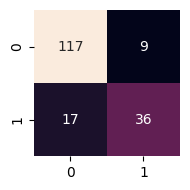

In [49]:
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(2,2))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

**Model MultinomialNB**

In [34]:
model_multi = MultinomialNB()
model_multi.fit(X_train, y_train)

MultinomialNB()

In [35]:
#Model Prediction - train data
y_train_multi_pred = model.predict(X_train)

#Model Prediction - test data
y_test_multi_pred = model.predict(X_test)

In [36]:
#Evaluation of the model
accuracy_train_multi = accuracy_score(y_train, y_train_multi_pred)
f1_train_multi = f1_score(y_train, y_train_multi_pred, average='macro')
classification_train_multi = classification_report(y_train, y_train_multi_pred)
print(f'Accuracy on train data is {accuracy_train_multi:.2f}')
print(f'F1 Score on train data is {f1_train_multi:.2f}')
print(f'Classification report on train data is\n {classification_train_multi}')

accuracy_predict_multi = accuracy_score(y_test, y_test_multi_pred)
f1_test_multi = f1_score(y_test, y_test_multi_pred, average='macro')
classification_test_multi = classification_report(y_test, y_test_multi_pred)
print(f'Accuracy on test data is {accuracy_predict_multi:.2f}')
print(f'F1 Score on test data is {f1_test_multi:.2f}')
print(f'Classification report on test data is\n {classification_test_multi}')

Accuracy on train data is 0.96
F1 Score on train data is 0.96
Classification report on train data is
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       458
           1       0.97      0.92      0.94       254

    accuracy                           0.96       712
   macro avg       0.96      0.95      0.96       712
weighted avg       0.96      0.96      0.96       712

Accuracy on test data is 0.85
F1 Score on test data is 0.81
Classification report on test data is
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       126
           1       0.81      0.64      0.72        53

    accuracy                           0.85       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.85      0.85      0.84       179



Both models presented the same F1 score result, so we'll optimize the Bernoulli.

**BernoulliNB Optimization**

In [37]:
hyperparams = {
    'force_alpha': [True, False],
    'alpha': [0, 1.0, 2.0],
    'fit_prior': [True, False],
    #'binarize': [None, 2.0, 5.0]
    }

model_bernoulli = GridSearchCV(model, hyperparams, scoring = macro_f1_scorer, cv = 5, n_jobs=8)
model_bernoulli

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=8,
             param_grid={'alpha': [0, 1.0, 2.0], 'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring=make_scorer(custom_f1_score))

In [38]:
model_bernoulli.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=8,
             param_grid={'alpha': [0, 1.0, 2.0], 'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring=make_scorer(custom_f1_score))

In [40]:
mb = model_bernoulli.best_estimator_

In [41]:
mb.fit(X_train, y_train)
y_train_pred = mb.predict(X_train)
y_test_pred = mb.predict(X_test)

In [42]:
Assessment.assess(y_train, y_test, y_train_pred, y_test_pred)

Accuracy on train data is 0.96
F1 Score on train data is 0.95
Classification report on train data is
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       458
           1       0.96      0.92      0.94       254

    accuracy                           0.96       712
   macro avg       0.96      0.95      0.95       712
weighted avg       0.96      0.96      0.96       712

Accuracy on test data is 0.85
F1 Score on test data is 0.82
Classification report on test data is
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       126
           1       0.80      0.68      0.73        53

    accuracy                           0.85       179
   macro avg       0.84      0.80      0.82       179
weighted avg       0.85      0.85      0.85       179



**Exploring other alternatives: LogisticRegression Model**

In [45]:
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_train_log_pred = model_log_reg.predict(X_train)
y_test_logt_pred = model_log_reg.predict(X_test)

In [51]:
Assessment.assess(y_train, y_test, y_train_log_pred, y_test_logt_pred)

Accuracy on train data is 0.91
F1 Score on train data is 0.90
Classification report on train data is
               precision    recall  f1-score   support

           0       0.88      0.99      0.94       458
           1       0.98      0.77      0.86       254

    accuracy                           0.91       712
   macro avg       0.93      0.88      0.90       712
weighted avg       0.92      0.91      0.91       712

Accuracy on test data is 0.84
F1 Score on test data is 0.77
Classification report on test data is
               precision    recall  f1-score   support

           0       0.82      0.98      0.90       126
           1       0.93      0.49      0.64        53

    accuracy                           0.84       179
   macro avg       0.87      0.74      0.77       179
weighted avg       0.85      0.84      0.82       179



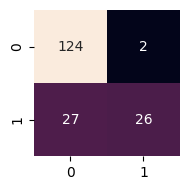

In [52]:
log_cm = confusion_matrix(y_test, y_test_logt_pred)

cm_df = pd.DataFrame(log_cm)

plt.figure(figsize=(2,2))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

Best model é Bernoulli optimized with GridSearch.

**Saving the model**

In [100]:
#model NaiveBayes
dump(mb, open("../models/gradient_boosting_classifier.sav", "wb"))